In [43]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib

In [36]:
data = pd.read_csv('data/Churn_cleaned.csv',index_col='RowNumber')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


#  Preprocessing

**Encoding Categorical Variables**

In [37]:
#One-Hot Encoding Geography and Gender columns
categorical_columns = ['Geography','Gender']
data_processed = pd.get_dummies(data,columns=categorical_columns,dtype=int)


In [6]:
data_processed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


**Standardizing Numerical Variables**

In [38]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

data_processed[numerical_columns] = scaler.fit_transform(data_processed[numerical_columns])

In [8]:
data_processed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
2,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
3,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
4,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
5,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0


**Preprocessor for Pipelines**

In [6]:
categorical_columns = ['Geography','Gender']
enc = OneHotEncoder(drop='first')

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
standardize_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', standardize_scaler, numerical_columns),
        ('cat', enc, categorical_columns)
    ])

*Splitting the Dataset*

In [39]:
X = data_processed.drop(columns = ['Exited'])
y = data_processed['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)

# Models

**Logistic Regression**

In [40]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)


**SVM**

In [59]:
svc_model = SVC(random_state = 42,probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True, random_state=42)

In [60]:
y_pred_svc = svc_model.predict(X_test)
y_prob_svc = svc_model.predict_proba(X_test)[:, 1]

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_prob_svc)

**Random Forest**

In [48]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

**Gradient Boosting**

In [50]:
gb_clf = GradientBoostingClassifier(random_state=42)

gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [51]:
y_pred_gb = gb_clf.predict(X_test)
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

**Performance Evaluation**

In [61]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM','Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_log_reg, accuracy_svc, accuracy_rf, accuracy_gb],
    'Precision': [precision_log_reg, precision_svc, precision_rf, precision_gb],
    'Recall': [recall_log_reg, recall_svc,recall_rf, recall_gb],
    'F1 Score': [f1_log_reg, f1_svc, f1_rf, f1_gb],
    'ROC AUC': [roc_auc_log_reg, roc_auc_svc, roc_auc_rf, roc_auc_gb]
})

results


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.808,0.589147,0.186732,0.283582,0.774792
1,SVM,0.864,0.853403,0.400491,0.545151,0.831739
2,Random Forest,0.858,0.763948,0.437346,0.556250,0.846292
3,Gradient Boosting,0.869,0.782101,0.493857,0.605422,0.870218


-  SVM, Random Forest, and Gradient Boosting have good accuracy but the recall is very low. 
-  However, considering the costs of customer churn, it is more important to have high recall(predicting as much churn correctly) even if it is at the cost of less  precision(false positives i.e predicted as churn but not actually churn)

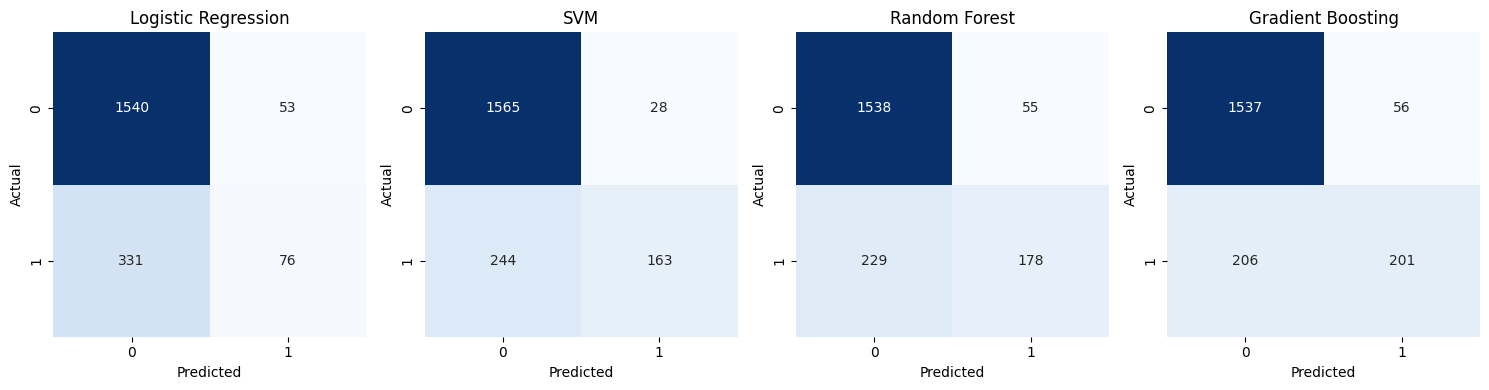

In [105]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svc, annot=True, fmt='d', ax=axes[1], cmap='Blues', cbar=False)
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[2], cmap='Blues', cbar=False)
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', ax=axes[3], cmap='Blues',cbar=False)
axes[3].set_title('Gradient Boosting')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')

plt.tight_layout()
plt.show()

-  High False Negatives(customers who actually churn but predicted as non churn) in all the models. 
-  The data imbalance in the training dataset caused the poor performance on the minority class(Churned customers).

### Upsampling + Hyperparameter Tuning

*Split the dataset*

In [63]:
X = data.drop(columns = ['Exited'])
y = data['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)

**Upsampling with SMOTE to have a balanced dataset**

In [93]:
#pipeline
smote = SMOTE(random_state=42)

pipelines = {
    'Logistic Regression':ImbPipeline(steps=[('preprocessor',preprocessor),('smote',smote),('classifier',LogisticRegression(random_state=42))]),
    'SVM': ImbPipeline(steps=[('preprocessor',preprocessor),('smote',smote),('classifier',SVC(probability=True,random_state = 42))]),
    'Random Forest': ImbPipeline(steps=[('preprocessor',preprocessor),('smote',smote),('classifier',RandomForestClassifier(random_state=42))]),
    'Gradient Boost': ImbPipeline(steps=[('preprocessor',preprocessor),('smote',smote),('classifier',GradientBoostingClassifier(random_state=42))])
}

metrics = {
    'Model':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[],
    'ROC AUC':[]

}

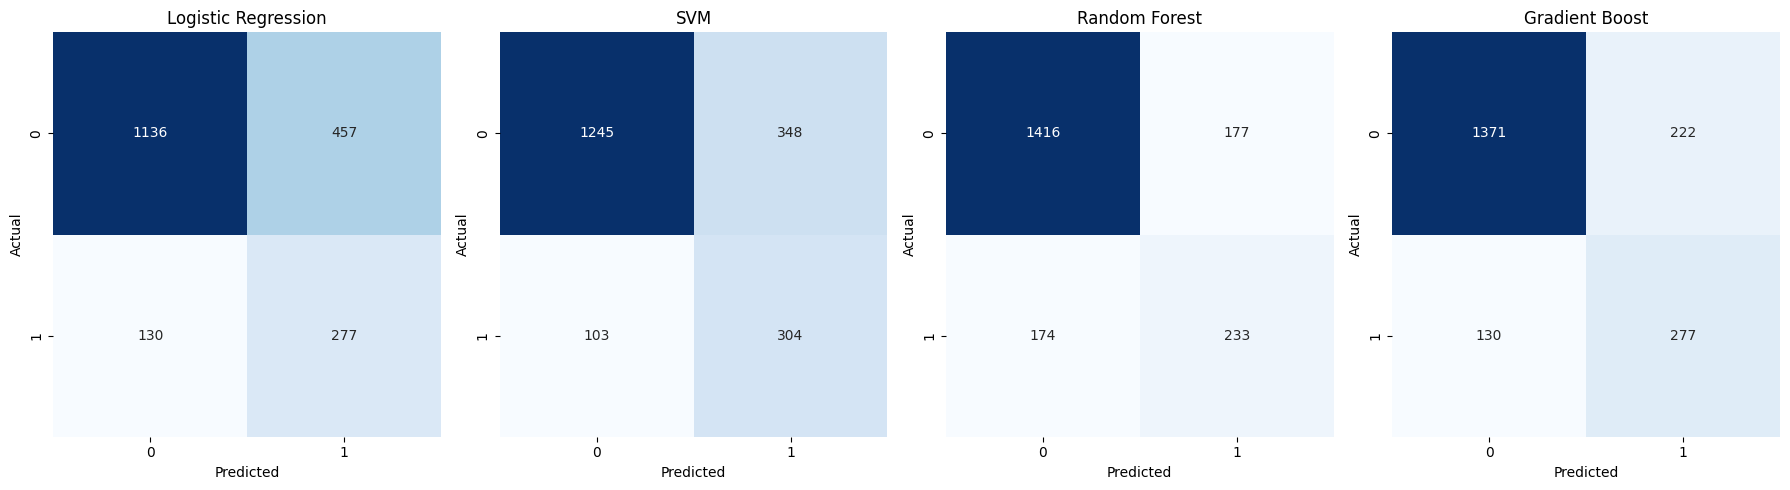

In [106]:
up_models = {}
#Train
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
for i,(name,pipeline) in enumerate(pipelines.items()):
    pipeline.fit(X_train,y_train)
    
    up_models[name] = pipeline
    
    y_pred=pipeline.predict(X_test)
    y_prob=pipeline.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix=confusion_matrix(y_test,y_pred)
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['ROC AUC'].append(roc_auc)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axes[i], cmap='Blues',cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    
plt.tight_layout()
plt.show()

In [95]:
results_df = pd.DataFrame(metrics)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.7065,0.377384,0.680590,0.485539,0.750092
1,SVM,0.7745,0.466258,0.746929,0.574127,0.836026
2,Random Forest,0.8245,0.568293,0.572482,0.570379,0.830084
3,Gradient Boost,0.8240,0.555110,0.680590,0.611479,0.853166


-  After upsampling, the Recall is higher i.e predicting more churned customers correctly than before balancing the dataset.  

**Hyperparameter Tuning**

In [69]:
from sklearn.model_selection import GridSearchCV

#define parameter grids
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}



In [12]:
grid_searches = {
    'Logistic Regression': GridSearchCV(estimator=pipelines['Logistic Regression'], param_grid=param_grid_lr, cv=5, scoring='f1', n_jobs=-1),
    # 'SVM': GridSearchCV(estimator=pipelines['SVM'],param_grid=param_grid_svm, cv=5, scoring='f1',n_jobs=-1),
    'Random Forest': GridSearchCV(estimator=pipelines['Random Forest'], param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1),
    'Gradient Boost': GridSearchCV(estimator=pipelines['Gradient Boost'], param_grid=param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
}

In [13]:
best_models = {}

for name, grid_search in grid_searches.items():
    print(f"Fitting {name}...")
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1 Score for {name}: {grid_search.best_score_}")

    best_model = grid_search.best_estimator_
    best_models[name]  = best_model
    
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"{name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{conf_matrix}\n")

Fitting Logistic Regression...
Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best F1 Score for Logistic Regression: 0.49339449840360067
Logistic Regression - Test Accuracy: 0.7080, Precision: 0.3799, Recall: 0.6880, F1 Score: 0.4895, ROC AUC: 0.7518

Confusion Matrix for Logistic Regression:
[[1136  457]
 [ 127  280]]

Fitting Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best F1 Score for Random Forest: 0.5994174858025793
Random Forest - Test Accuracy: 0.8065, Precision: 0.5184, Recall: 0.6929, F1 Score: 0.5931, ROC AUC: 0.8464

Confusion Matrix for Random Forest:
[[1331  262]
 [ 125  282]]

Fitting Gradient Boost...
Best parameters for Gradient Boost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n

-  Only Random Forest seems to have any significant improvement in Recall, Precision, F1, ROC AUC, after the hyperparameter tuning. 
-  Gradient Boost's Recall reduced after tuning.

In [97]:
#choose the GB model pre tuning as the best GB model
tuned_gb = best_models['Gradient Boost']
best_models['Gradient Boost'] = up_models['Gradient Boost']

In [76]:
name = 'SVM'
grid_search_svm = GridSearchCV(estimator=pipelines['SVM'],param_grid=param_grid_svm, cv=5, scoring='f1',n_jobs=-1)

print(f"Fitting {name}...")
grid_search_svm.fit(X_train, y_train)

print(f"Best parameters for {name}: {grid_search_svm.best_params_}")
print(f"Best F1 Score for {name}: {grid_search_svm.best_score_}")

best_svm = grid_search_svm.best_estimator_
best_models[name]  = best_svm

y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"{name} - Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for {name}:\n{conf_matrix}\n")

Fitting SVM...
Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best F1 Score for SVM: 0.5788402179840523
SVM - Test Accuracy: 0.7745, Precision: 0.4666, Recall: 0.7543, F1 Score: 0.5765, ROC AUC: 0.8388

Confusion Matrix for SVM:
[[1242  351]
 [ 100  307]]



-  Tuning SVM shows only a modest gain in the metrics.

In [100]:
#saving the models
for name, best_model in best_models.items():
    joblib.dump(best_model, f"models/{name.replace(' ', '_').lower()}_best_model.pkl")


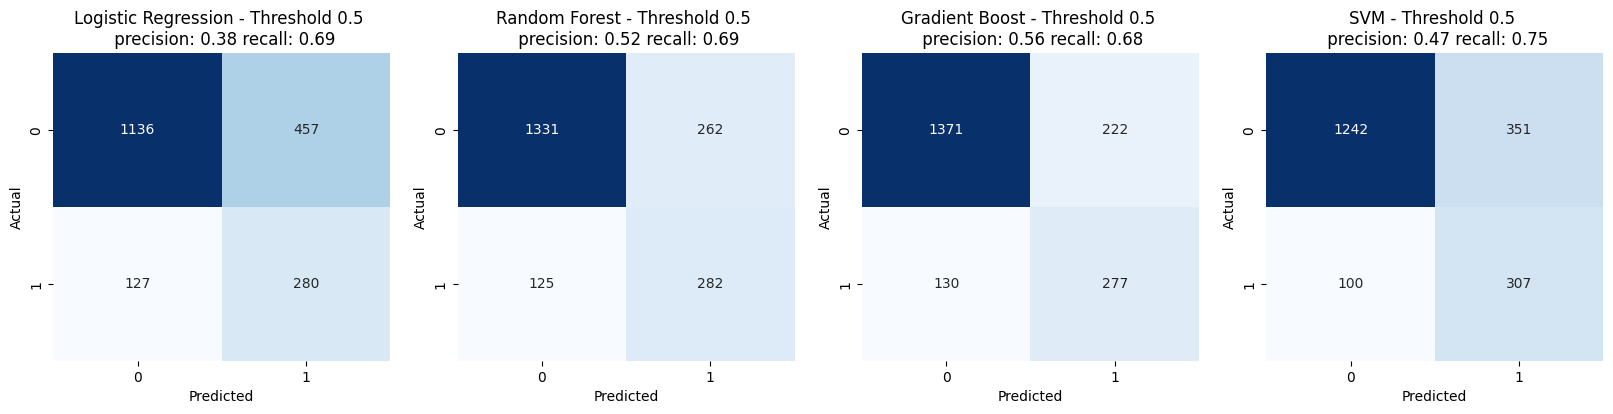

In [111]:
#confusion matrix, precision, and recall of the best models
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for i, (name, best_model) in enumerate(best_models.items()):
    y_pred = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axes[i], cmap='Blues',cbar=False)
    axes[i].set_title(f"{name} - Threshold 0.5 \n precision: {precision:.2f} recall: {recall:.2f}")
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

-  Logistic Regression is outperformed by other models significantly(Too many False Positives)
-  Random Forest, Gradient Boost, and SVM has good recall along with a precision that is not too less. 
-  Finding the right threshold for RF, GB, and SVM to have more True Positives will help further. 

**Finding the best threshold for a higher True Positive Rate**

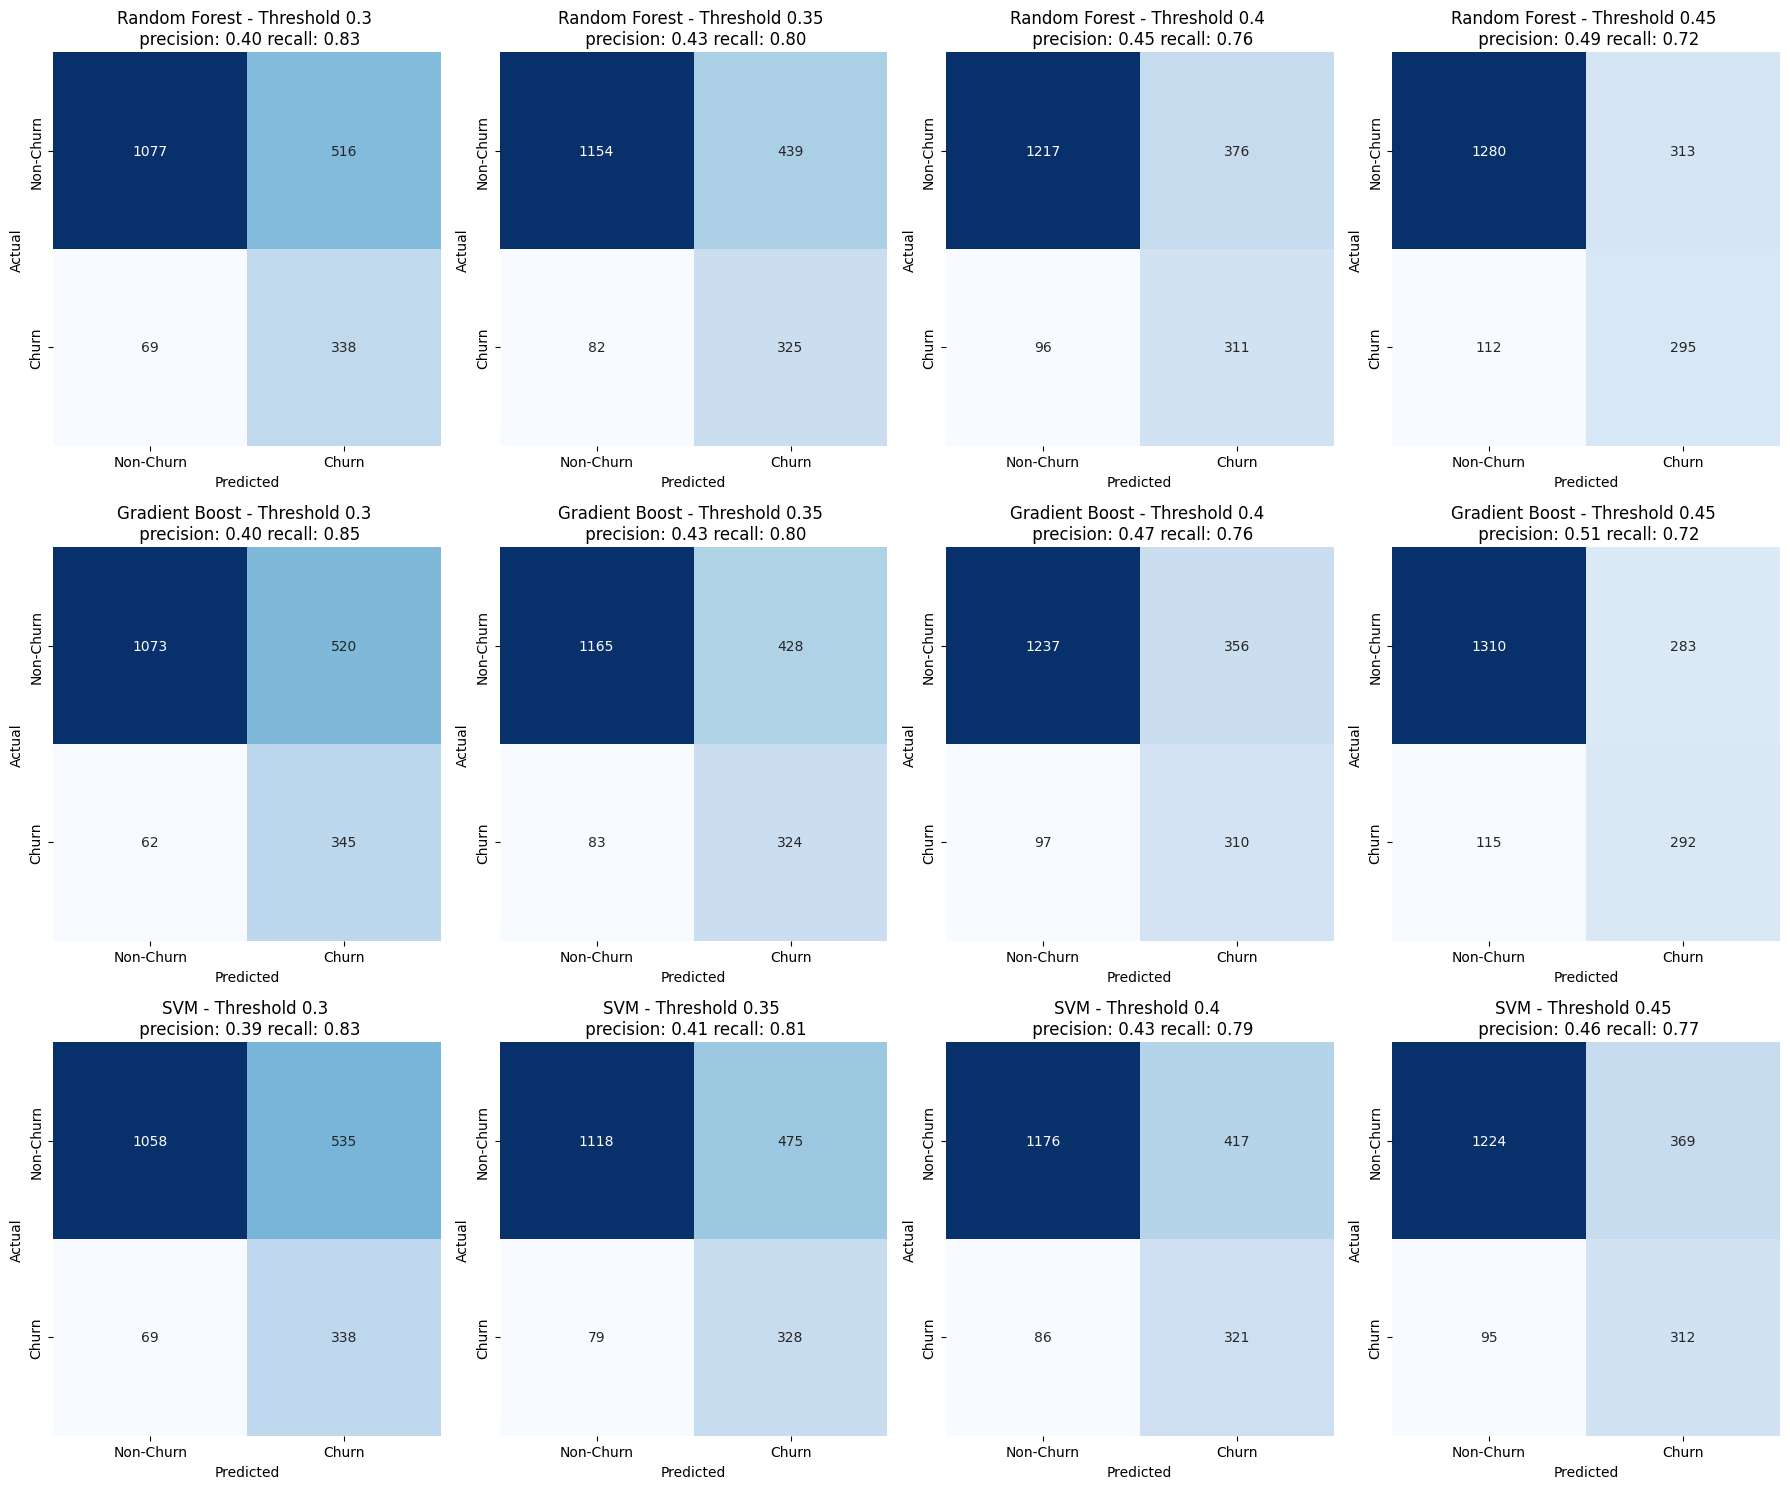

In [113]:
thresholds = [0.3, 0.35, 0.4,0.45]

fig, axes = plt.subplots(3, 4, figsize=(18, 15))
model_names = list(best_models.keys())
for i,name in enumerate(model_names[1:]):

    best_model = joblib.load(f"models/{name.replace(' ', '_').lower()}_best_model.pkl")

    y_prob = best_model.predict_proba(X_test)[:, 1]

    for j,threshold in enumerate(thresholds):
        y_pred = (y_prob >= threshold).astype(int)

        conf_matrix = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'],ax=axes[i,j],cbar=False)
        axes[i,j].set_title(f"{name} - Threshold {threshold} \n precision: {precision:.2f} recall: {recall:.2f}")
        axes[i,j].set_xlabel('Predicted')
        axes[i,j].set_ylabel('Actual')
            
plt.tight_layout()    
plt.show()


-  Gradient Boost(threshold 0.3) predicts 85% of Churn customers correctly. However, precision is 0.40, meaning, of all those predicted to be churn, 40% will actually be churn. 

-  Gradient Boost and Random Forest(threshold 0.35) predicts 80% of the churn customers correctly. Precision is 0.43 -> of all those predicted as churn, 43% will actully be Churn. 

-  SVM(threshold 0.45) and Gradient Boost(threshold 0.4) predicts around 75% of total churn customers correctly. Precision -> Around 45%.

-  Random Forest(threshold 0.5) and Gradient Boost(threshold 0.45) predicts around 70% of churn customers. Precision -> Around 50%.

-  **Depending on the business objective, one can choose the suitable model & threshold.**